In [78]:
%matplotlib inline

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
# Files to load
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [81]:
#Reviewing the data
city_data_df.isnull().sum()
ride_data_df.isnull().sum()
city_data_df.dtypes
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [82]:
ride_data_df.head(4)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178


In [83]:
city_data_df.head(4)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban


In [84]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [85]:
# Get the number of data points from the Urban, Suburban, and Rural cities.
urban_sum = sum(city_data_df["type"]=="Urban")
suburban_sum = sum(city_data_df["type"]=="Suburban")
rural_sum = sum(city_data_df["type"]=="Rural")
rural_sum

18

In [86]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left" , on=["city", "city"])
pyber_data_df.head(4)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban


In [87]:
# Create the Urban, Suburban, and Rural city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [88]:
# Get the number of rides for urban, suburban, and rural cities.
urban_cities_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_cities_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_cities_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [89]:
# Get average fare for each city in the urban, suburban , and rural cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [90]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

FileNotFoundError: [Errno 2] No such file or directory: '/Resources/Fig1.png'

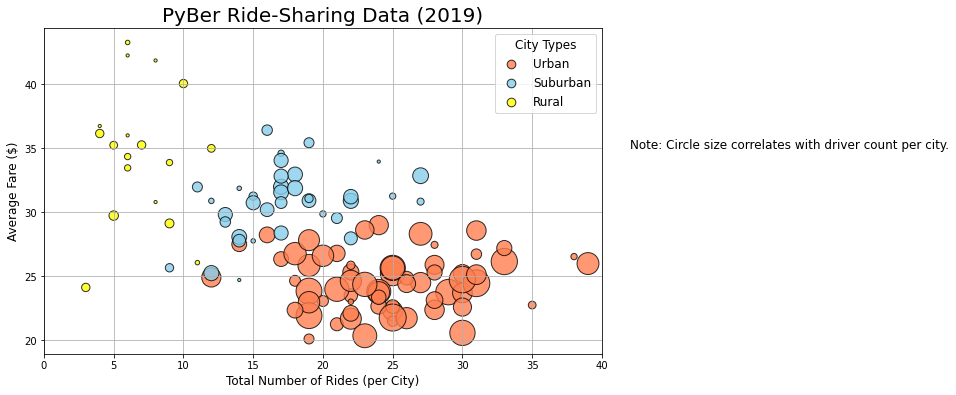

In [112]:
#Create a Scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(urban_cities_count, urban_avg_fare, marker = "o", color = "coral",
           label = 'Urban', s=10*urban_driver_count, linewidth=1, edgecolor='k',  alpha=0.8)

ax.scatter(suburban_cities_count, suburban_avg_fare, s=10*suburban_driver_count, marker = "o", color = "skyblue",
           label = 'Suburban', linewidth=1, edgecolor='k',  alpha=0.8)

ax.scatter(rural_cities_count, rural_avg_fare, s=10*rural_driver_count, marker = "o", color = "yellow",
           label = 'Rural', linewidth=1, edgecolor='k',  alpha=0.8)

# Create labels for the x and y axes.
plt.xlabel('Total Number of Rides (per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)

# Create a title.
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)

#Add a limit for x-axis
plt.xlim(0, 40)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.grid(True)

# Save the figure.
plt.savefig("/Resources/" + "Fig1.png", dpi=100, format=None, metadata=None,
        bbox_inches='tight', pad_inches=0.8,
        facecolor='w', edgecolor='w',
        backend=None)

plt.show()


<Figure size 432x288 with 0 Axes>